In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
df_X = np.array(diabetes.data)
df_y = np.array(diabetes.target)

print(df_X.shape, df_y.shape)
print(df_X,df_y)

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=42)

In [4]:
# W: 10개의 난수로 구성된 벡터, b: 난수 1개 생성.
W = np.random.randn(10)
b = np.random.randn()
print(W,b)

[-0.01137052  0.22672049  1.7449424   0.01467805  0.65270615 -0.21970661
  1.78593246 -1.32927272 -0.68508534  1.24537064] 0.4917190934320457


In [5]:
# 모델 함수 구현
def model(X, W, b):
    prediction = 0
    for i in range(10):
        prediction += X[:,i]*W[i]
    prediction += b
    return prediction

In [6]:
# loss 함수 구현
def loss(X, W, b, y):
    prediction = model(X, W, b)
    return ((y - prediction)**2).mean()

In [7]:
# gradient 함수 구현
def gradient(X, W, b, y):
    
    pred = model(X, W, b)
    N = len(y)
    
    # dL/dW 계산해서 dW변수에 저장.
    dW = (2/N)*X.T.dot(pred - y)
    
    # dL/db 계산해서 db 변수에 저장.
    db = 2 * (pred - y).mean()
    
    return dW, db

In [8]:
# Learning Rate 설정
learning_rate = 0.1

Iteration 100: Loss 5381.2506
Iteration 200: Loss 4895.2254
Iteration 300: Loss 4532.0944
Iteration 400: Loss 4257.1787
Iteration 500: Loss 4046.0002
Iteration 600: Loss 3881.2357
Iteration 700: Loss 3750.5858
Iteration 800: Loss 3645.2833
Iteration 900: Loss 3559.0472
Iteration 1000: Loss 3487.3508


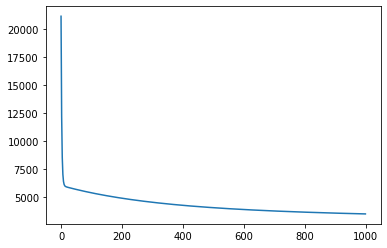

In [9]:
# 학습 과정에서 loss 기록해 둘 리스트
losses = []

# 모델 학습
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration {}: Loss {:.4f}'.format(i,L))

# losses 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [10]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3090.179760308433

In [11]:
print(prediction, y_test)

[162.97286179 160.1058704  160.03325784 250.71299597 149.70341455
 130.16847331 218.19592451 196.06355852 115.45686431 137.80758769
 116.80193191 139.9693369   81.97192206 201.46672187 127.31227269
 136.99073576 208.58089405 225.18283635 164.0108462  199.12073432
 170.01525634 117.10886115  99.0764745  182.9089065  142.31565594
 165.48205445 175.62506463 172.04457313  76.66886891 144.49406779
 169.93620584 112.59299262 146.19048323 179.78740082 174.64813621
 181.40383651 144.15938453 149.32207905 172.2966172   89.08813814
 108.09656606 131.7191728  154.08458792 172.29717557 164.82181377
  93.12333991  99.38523078 108.76563771  87.24364601 142.71166396
 132.17244384  88.17754226 141.89474854 121.43804719 183.34302596
 138.58445153 122.79635673 180.92247678 119.73494312  84.34823292
 181.57635623 167.8636305  137.22884413 134.51217868 137.60726647
 180.59427184 178.14439346 161.71372217 107.18924362 148.51641248
 169.47108923 194.48573217 221.28259669 144.81525056 103.35621319
 170.52559

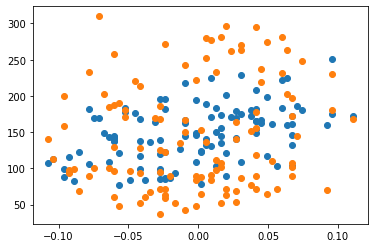

In [12]:
plt.scatter(X_test[:, 0], prediction)
plt.scatter(X_test[:, 0], y_test)
plt.show()